## Height and Weight

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Getting info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


**No null data i found**

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
df.duplicated().sum()

0

In [56]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


## Exploring data

In [23]:
print("number of males :-",df[df["Gender"]=='Male'].shape[0])
print("number of Females :-",df[df["Gender"]=='Female'].shape[0])

number of males :- 5000
number of Females :- 5000


Text(0.5, 1.0, 'count of male and female')

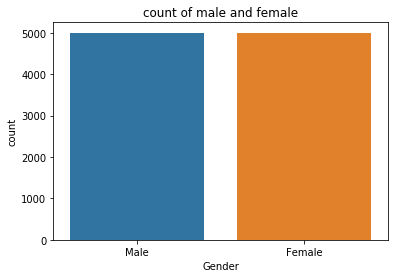

In [34]:
sns.countplot(data=df,x="Gender")
plt.title("count of male and female")

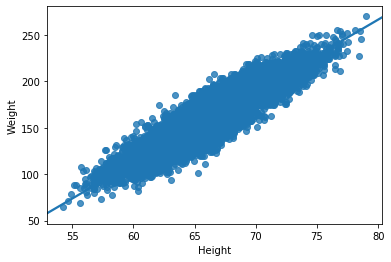

In [33]:
sns.regplot(x='Height',y="Weight",data=df)

## Fitting Logistic Regression Model


**our Gender coloumn is categorical we need to change it**

In [40]:
data=df.copy()

In [44]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Gender']=lb.fit_transform(data["Gender"])

In [45]:
data.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [64]:
x=data[['Gender','Height']]
y=data['Weight']

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
X_train.head()

,Gender,Height
7389,0,59.368139
9275,0,63.916578
2995,0,73.075345
5316,0,62.426961
356,0,70.490929


In [76]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred=clf.predict(X_test)
y_pred

array([148.7894772 , 168.43520123, 224.31884497, ..., 159.17576427,
       155.86404539, 144.83449257])

In [87]:
y_predi=clf.predict([[0,75]])
y_predi

array([228.01184519])